In [83]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [89]:
def draw(x1, x2):
    ln = plt.plot(x1, x2)
    
def sigmoid(score):
    return 1 / (1 + np.exp(-score))


def calcuation_error(line_parameters, points, y):
    n = points.shape[0]
    p = sigmoid(points*line_parameters)   
    cross_entropy = -(1/n) * (np.log(p).T * y + np.log(1-p).T * (1-y))
    return cross_entropy   

def calcuation_error_1(p, y):
    
    cross_entropy = -(y * np.log(p) + (1 - y) * np.log(1-p))
    return cross_entropy

In [90]:
n_pts = 10

np.random.seed(0)
#random_x1_values = np.random.normal(10, 2, n_pts)
#random_x2_values = np.random.normal(12, 2, n_pts)
#top_region = np.array([random_x1_values, random_x2_values]).T
#top_region
#top_range.shape

bias = np.ones(n_pts)

top_region = np.array([np.random.normal(10, 2, n_pts), np.random.normal(12, 2, n_pts), bias]).T
bottom_region = np.array([np.random.normal(5, 2, n_pts), np.random.normal(6, 2, n_pts), bias]).T

all_points = np.vstack((top_region, bottom_region))
#all_points.shape

#make a random line
w1 = -0.2
w2 = -0.35
b = 3.5

line_parameters = np.matrix([w1, w2, b]).T
#print(line_parameters)

x1 = np.array([bottom_region[:, 0].min(), top_region[:, 0].max()])
# formula: w1.x1 + w2.x2 + b = 0
# Y = M.X + b
x2 = -b / w2 + x1 * (-w1 / w2)
#print(x1, x2)

""" 
line_parameters has been transposed for matrix multiplication 
where number of columns from all_points matrix = number of rows from line_parameters matrix
""" 

#print(all_points.shape)
#print(line_parameters.shape)


y = np.array([np.zeros(n_pts), np.ones(n_pts)]).reshape(n_pts*2, 1)

result = calcuation_error(line_parameters, all_points, y)
print(result)

print("--------another way of code---------")


linear_combination = all_points * line_parameters

probabilities = sigmoid(linear_combination)
#print(probabilities) 

prediction = (np.asarray(probabilities)).flatten()
target = (np.asarray(y)).flatten()

#
result1 = calcuation_error_1(probabilities, target)
print(result1)



[[0.31787835]]
--------another way of code---------
[[6.35756704]]


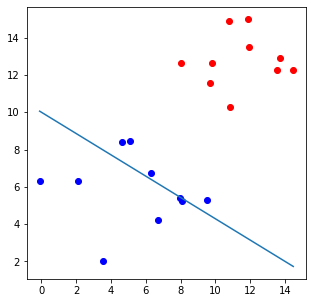

In [86]:

_, ax = plt.subplots(figsize=(5,5))
ax.scatter(top_region[:, 0], top_region[:, 1], color='r')
ax.scatter(bottom_region[:, 0], bottom_region[:, 1], color='b')
draw(x1, x2)
plt.show()
